In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("/content/ex1data1.csv",names=["Population","Profit"])
print(data)

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

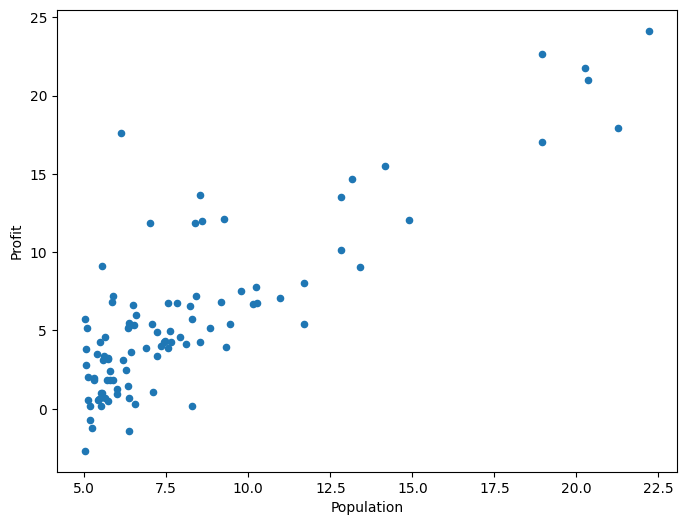

In [4]:
data.plot(kind='scatter',x="Population",y="Profit",figsize=(8,6))

In [5]:
data.shape

(97, 2)

In [6]:
data.shape[0]

97

In [7]:
data.shape[1]

2

In [8]:
data.insert(0,"ones",1)

In [9]:
cols=data.shape[1]
X = data.iloc[:,0:cols-1]
Y = data.iloc[: , cols-1:cols]

In [10]:
data.shape


(97, 3)

In [11]:
print(data)


    ones  Population    Profit
0      1      6.1101  17.59200
1      1      5.5277   9.13020
2      1      8.5186  13.66200
3      1      7.0032  11.85400
4      1      5.8598   6.82330
..   ...         ...       ...
92     1      5.8707   7.20290
93     1      5.3054   1.98690
94     1      8.2934   0.14454
95     1     13.3940   9.05510
96     1      5.4369   0.61705

[97 rows x 3 columns]


In [12]:
x_matrix=np.matrix(X.values)
y_matrix=np.matrix(Y.values)
theta = np.matrix(np.array([0,0]))

print(theta)
print(x_matrix)
print(y_matrix)
y_matrix.shape
x_matrix.shape


[[0 0]]
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

(97, 2)

In [13]:
theta.shape

(1, 2)

In [14]:
X.shape


(97, 2)

In [15]:
theta.T.shape

(2, 1)

In [23]:
def costFun(X, y, theta):

  m = len(y)  # Number of training examples

  # Calculate the predictions (hypothesis)
  predictions = X.dot(theta.T)

  # Calculate the squared errors
  squared_errors = np.square(predictions - y)

  # Calculate the cost
  cost = np.sum(squared_errors) / (2 * m)

  return cost

In [24]:
print(costFun(x_matrix,y_matrix,theta))

32.072733877455676


In [28]:
def gradientDescent(x, y, theta, alpha, iterations):
  temp=np.matrix(np.zeros(theta.shape))
  parameters=int(theta.shape[1])
  cost=np.zeros(iterations)
  for i in range(iterations):
    error=(x * theta.T)-y
    for j in range(parameters):
      term=np.multiply(error,x[:,j])

      temp[0,j]=theta[0,j]-((alpha/len(x))*np.sum(term))
    theta=temp
    cost[i]=costFun(x,y,theta)
  return theta,cost

In [29]:
alpha=0.001
iterations=1000

In [30]:
Theta,C=gradientDescent(x_matrix,y_matrix,theta=theta,alpha=alpha,iterations=iterations)
Theta

matrix([[-0.57607021,  0.8595327 ]])

In [31]:
print(gradientDescent(x_matrix,y_matrix,theta,alpha,iterations))

(matrix([[-0.57607021,  0.8595327 ]]), array([27.94761975, 24.47289937, 21.54601437, 19.08057847, 17.00382734,
       15.25447061, 13.7808826 , 12.5395783 , 11.49392969, 10.61308452,
        9.87105552,  9.24595327,  8.71934001,  8.27568536,  7.90190791,
        7.58698897,  7.32164737,  7.09806546,  6.90965833,  6.75087941,
        6.61705675,  6.50425513,  6.40915982,  6.32897881,  6.26136035,
        6.20432352,  6.15619976,  6.11558363,  6.08129131,  6.05232565,
        6.02784674,  6.00714709,  5.98963081,  5.97479594,  5.9622197 ,
        5.95154595,  5.94247473,  5.93475337,  5.92816904,  5.92254248,
        5.91772269,  5.91358249,  5.91001473,  5.90692918,  5.90424984,
        5.90191267,  5.89986376,  5.89805767,  5.89645614,  5.89502695,
        5.89374295,  5.89258128,  5.89152267,  5.8905509 ,  5.88965231,
        5.88881538,  5.88803043,  5.88728928,  5.88658506,  5.88591197,
        5.88526513,  5.88464043,  5.88403441,  5.88344416,  5.88286721,
        5.88230149,  5.88